## Mathematical model of a Neuron
<div>
<div width="50%" align="left">
<img src="https://upload.wikimedia.org/wikipedia/commons/thumb/b/b5/Neuron.svg/600px-Neuron.svg.png" width="40%">
</div>
<div width="50%" align="right">
<img src="https://i.stack.imgur.com/gzrsx.png" width="40%">
</div>
</div>

In the following example of Neural Networks, we will train a `Multi-Layer Perceptron` model to classify and predict the type of flowers from the Iris Dataset. Since we have only one dataset, we will train the model on 80% of the data, and test for accuracy on the remaining 20%.

We have to make sure that a model is trained on data which belong to the same distribution as that of the test data. This is because if we train on a sample from Population 1 and test the model on a sample from Population 2, we might end up with a `high variance problem`.

* `MLPClassifier` is the Python object to the Nueral Network we are going to train
* `train_test_split` divided the given dataset as per the specified `test_size`. Here, 0.2 means 20%

In [1]:
# # installing packages
# !pip install numpy
# !pip install pandas
# !pip install seaborn
# !pip install sklearn

In [30]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

<img src="https://cdn-images-1.medium.com/max/1600/0*7H_gF1KnslexnJ3s" width="80%">

## Dataset

[Iris Data Set @ UCI Machine Learning Repository](https://archive.ics.uci.edu/ml/datasets/iris)

#### Features:
* sepal length in cm 
* sepal width in cm 
* petal length in cm 
* petal width in cm 
* class: 
    * Iris Setosa 
    * Iris Versicolour 
    * Iris Virginica
    
#### Objective:
Supervise a Machine Learning Model to trace patterns between the four attributes and classify them into clusters using a [Multi Layer Perceptron](https://skymind.ai/wiki/multilayer-perceptron) (Feed Forward Neural Network)

In [3]:
# reading data into a dataframe
# separating data by ","
# giving names to columns
df = pd.read_csv("https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data", 
                 sep = ",", 
                 names = ['sepal_l', 
                          'sepal_w', 
                          'petal_l', 
                          'petal_w', 
                          'class'])

# display the top 5 observations from the dataframe
df.head()

,sepal_l,sepal_w,petal_l,petal_w,class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


/Users/sumitsaha/anaconda/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


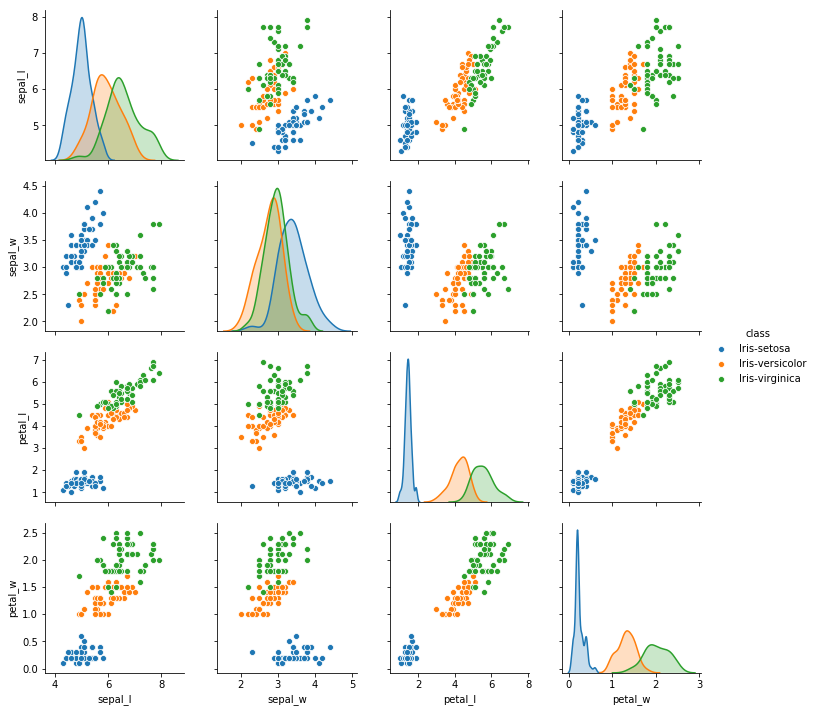

In [4]:
sns.pairplot(data = df, 
             vars = ('sepal_l',
                     'sepal_w',
                     'petal_l',
                     'petal_w'),
             hue = 'class')

The three classes of Iris available in the dataset are as follows

In [5]:
df['class'].unique()

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

Since we are trying to carry out a classification task, it would be easier for us to map the classes to a unique integer ID. Here, we have created a dictionary and used the `replace` function of Pandas.

In [6]:
# replacing "String" class names with "Integer" identifiers
iris_class = {
    'Iris-setosa' : 0,
    'Iris-versicolor' : 1,
    'Iris-virginica' : 2
}

df= df.replace({"class": iris_class})
# df = df[(df['class'] == 0) | (df['class'] == 1)]
df.head()

,sepal_l,sepal_w,petal_l,petal_w,class
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


## Dividing the dataset in a Train:Test ratio of 80:20
<img src="https://cdn-images-1.medium.com/max/2000/1*-8_kogvwmL1H6ooN1A1tsQ.png" width="70%">

In [7]:
df = df.apply(pd.to_numeric)
df_array = df.values
X_train, X_test, y_train, y_test = train_test_split(df_array[:,:4], df_array[:,4], test_size=0.2)

In [8]:
print("X_train has {0} observations with {1} features".format(X_train.shape[0], X_train.shape[1]))
print("y_train has {0} class values".format(y_train.shape[0]))
print("X_test has {0} observations with {1} features".format(X_test.shape[0], X_test.shape[1]))
print("y_test has {0} class values".format(y_test.shape[0]))

X_train has 120 observations with 4 features
y_train has 120 class values
X_test has 30 observations with 4 features
y_test has 30 class values


## Building the Neural Network has never been easier!!
<img src="https://www.neuraldesigner.com/images/learning/iris_flowers_neural_network_graph.png">

## Hidden Layers
* hidden_layer_sizes = (100,) means 100 nodes in 1 hidden layer
* hidden_layer_sizes = (100, 100) means 100 nodes in 1st hidden layer & 100 nodes in 2nd hidden layer
* hidden_layer_sizes = (4, 5, 6) means 4 nodes in 1st hidden layer, 5 nodes in 2nd hidden layer and 6 nodes in 3rd hidden layer

## Activation Functions
* activation = "identity" : linear activation, f(x) = x
* activation = "logistic" : sigmoid activation, f(x) = 1 / ( 1 + exp( - x ))
* activation = "tanh" : hyperbolic activation, f(x) = tanh( x )
* activation = "relu" : rectified linear unit activation, f(x) = max( 0 , x ) 

## Solver
* solver = "sgd" : Stochastic Gradient Descent - Good for small datasets
* solver = "adam" : Adam Optimisation - Good for large datasets
* solver = "lbfgs" : Limited Memory Broyden–Fletcher–Goldfarb–Shanno - Good for small datasets

In [9]:
mlp = MLPClassifier(hidden_layer_sizes = (100,), 
                    activation = 'relu',
                    solver = 'sgd', 
                    learning_rate_init = 0.01, 
                    max_iter = 200,
                    verbose = True)

In [10]:
mlp.fit(X_train, y_train)
y_pred = mlp.predict(X_test)
print("Accuracy: {0}%".format(round(mlp.score(X_test,y_test), 2) * 100))

Accuracy: 100.0%


/Users/sumitsaha/anaconda/lib/python3.6/site-packages/sklearn/neural_network/multilayer_perceptron.py:563: ConvergenceWarning: Stochastic Optimizer: Maximum iterations reached and the optimization hasn't converged yet.
  % (), ConvergenceWarning)


In [11]:
compare = pd.DataFrame(list(zip(X_test[:, 0], 
                                X_test[:, 1], 
                                X_test[:, 2], 
                                X_test[:, 3], 
                                y_test, 
                                mlp.predict(X_test),
                                (y_test - mlp.predict(X_test)))),
                           columns = ['sepal_l', 
                                      'sepal_w',
                                      'petal_l', 
                                      'petal_w', 
                                      'actual', 
                                      'prediction',
                                      'difference'])

compare.head()

,sepal_l,sepal_w,petal_l,petal_w,actual,prediction,difference
0,6.1,3.0,4.6,1.4,1.0,1.0,0.0
1,6.3,2.3,4.4,1.3,1.0,1.0,0.0
2,5.1,3.5,1.4,0.3,0.0,0.0,0.0
3,5.8,2.8,5.1,2.4,2.0,2.0,0.0
4,6.8,3.0,5.5,2.1,2.0,2.0,0.0


In [12]:
print("Length of TEST dataset: ", len(X_test))
print("Number of correct predictions: ", len(compare[compare['difference'] == 0.0]))

Length of TEST dataset:  30
Number of correct predictions:  30


## Testing out a few examples

In [13]:
data = np.array(
    [
        [5.8, 4.0, 1.2, 0.2],
        [3.2, 3.1, 3.2, 1.2],
        [5.4, 2.0, 2.0, 2.3],
        [6.4, 3.2, 4.5, 1.5],
        [2.3, 4.1, 4.6, 3.2]
    ]
)

for i in data:
    print(i, " -> ", mlp.predict(i.reshape(1, -1)))

[5.8 4.  1.2 0.2]  ->  [0.]
[3.2 3.1 3.2 1.2]  ->  [1.]
[5.4 2.  2.  2.3]  ->  [1.]
[6.4 3.2 4.5 1.5]  ->  [1.]
[2.3 4.1 4.6 3.2]  ->  [2.]


## Exploratory Data Analysis (EDA): Delving into Feature Engineering

#### Dataset:
[Epileptic Seizure Recognition](https://archive.ics.uci.edu/ml/datasets/Epileptic+Seizure+Recognition)

#### Data Dictionary:
The response variable is y in column 179, the Explanatory variables X1, X2, ..., X178 

y contains the category of the 178-dimensional input vector. Specifically y in {1, 2, 3, 4, 5}: 

5 - eyes open, means when they were recording the EEG signal of the brain the patient had their eyes open 

4 - eyes closed, means when they were recording the EEG signal the patient had their eyes closed 

3 - Yes they identify where the region of the tumor was in the brain and recording the EEG activity from the healthy brain area 

2 - They recorder the EEG from the area where the tumor was located 

1 - Recording of seizure activity 

All subjects falling in classes 2, 3, 4, and 5 are subjects who did not have epileptic seizure. Only subjects in class 1 have epileptic seizure. Our motivation for creating this version of the data was to simplify access to the data via the creation of a .csv version of it. Although there are 5 classes most authors have done binary classification, namely class 1 (Epileptic seizure) against the rest.

#### Objective:
To predict whether the patient would suffer from an Epileptic Seizure using MLPClassifier 

In [37]:
df = pd.read_csv("https://archive.ics.uci.edu/ml/machine-learning-databases/00388/data.csv")
df = df.iloc[:, 1:]
df = df.apply(pd.to_numeric)
df.head()

,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,...,X170,X171,X172,X173,X174,X175,X176,X177,X178,y
0,135,190,229,223,192,125,55,-9,-33,-38,...,-17,-15,-31,-77,-103,-127,-116,-83,-51,4
1,386,382,356,331,320,315,307,272,244,232,...,164,150,146,152,157,156,154,143,129,1
2,-32,-39,-47,-37,-32,-36,-57,-73,-85,-94,...,57,64,48,19,-12,-30,-35,-35,-36,5
3,-105,-101,-96,-92,-89,-95,-102,-100,-87,-79,...,-82,-81,-80,-77,-85,-77,-72,-69,-65,5
4,-9,-65,-98,-102,-78,-48,-16,0,-21,-59,...,4,2,-12,-32,-41,-65,-83,-89,-73,5


In [51]:
# understanding the dataset from a bird's eye point-of-view
df.describe()

,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,...,X170,X171,X172,X173,X174,X175,X176,X177,X178,y
count,11500.000000,11500.000000,11500.000000,11500.000000,11500.000000,11500.000000,11500.000000,11500.00000,11500.00000,11500.000000,...,11500.000000,11500.000000,11500.000000,11500.000000,11500.000000,11500.000000,11500.000000,11500.000000,11500.000000,11500.000000
mean,-11.581391,-10.911565,-10.187130,-9.143043,-8.009739,-7.003478,-6.502087,-6.68713,-6.55800,-6.168435,...,-10.145739,-11.630348,-12.943478,-13.668870,-13.363304,-13.045043,-12.705130,-12.426000,-12.195652,0.200000
std,165.626284,166.059609,163.524317,161.269041,160.998007,161.328725,161.467837,162.11912,162.03336,160.436352,...,164.652883,166.149790,168.554058,168.556486,167.257290,164.241019,162.895832,162.886311,164.852015,0.400017
min,-1839.000000,-1838.000000,-1835.000000,-1845.000000,-1791.000000,-1757.000000,-1832.000000,-1778.00000,-1840.00000,-1867.000000,...,-1867.000000,-1865.000000,-1642.000000,-1723.000000,-1866.000000,-1863.000000,-1781.000000,-1727.000000,-1829.000000,0.000000
25%,-54.000000,-55.000000,-54.000000,-54.000000,-54.000000,-54.000000,-54.000000,-55.00000,-55.00000,-54.000000,...,-55.000000,-56.000000,-56.000000,-56.000000,-55.000000,-56.000000,-55.000000,-55.000000,-55.000000,0.000000
50%,-8.000000,-8.000000,-7.000000,-8.000000,-8.000000,-8.000000,-8.000000,-8.00000,-7.00000,-7.000000,...,-9.000000,-10.000000,-10.000000,-10.000000,-10.000000,-9.000000,-9.000000,-9.000000,-9.000000,0.000000
75%,34.000000,35.000000,36.000000,36.000000,35.000000,36.000000,35.000000,36.00000,36.00000,35.250000,...,34.000000,34.000000,33.000000,33.000000,34.000000,34.000000,34.000000,34.000000,34.000000,0.000000
max,1726.000000,1713.000000,1697.000000,1612.000000,1518.000000,1816.000000,2047.000000,2047.00000,2047.00000,2047.000000,...,1777.000000,1472.000000,1319.000000,1436.000000,1733.000000,1958.000000,2047.000000,2047.000000,1915.000000,1.000000


In [52]:
# replacing all other column 'y' values with 0
# non-zero values represent False for seizure-activity
df['y'] = df['y'].replace([5], [0]).ravel()
df['y'] = df['y'].replace([3], [0]).ravel()
df['y'] = df['y'].replace([4], [0]).ravel()
df['y'] = df['y'].replace([2], [0]).ravel()

In [53]:
df.head()

,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,...,X170,X171,X172,X173,X174,X175,X176,X177,X178,y
0,135,190,229,223,192,125,55,-9,-33,-38,...,-17,-15,-31,-77,-103,-127,-116,-83,-51,0
1,386,382,356,331,320,315,307,272,244,232,...,164,150,146,152,157,156,154,143,129,1
2,-32,-39,-47,-37,-32,-36,-57,-73,-85,-94,...,57,64,48,19,-12,-30,-35,-35,-36,0
3,-105,-101,-96,-92,-89,-95,-102,-100,-87,-79,...,-82,-81,-80,-77,-85,-77,-72,-69,-65,0
4,-9,-65,-98,-102,-78,-48,-16,0,-21,-59,...,4,2,-12,-32,-41,-65,-83,-89,-73,0


X_train has 9200 observations with 178 features
y_train has 9200 class values
X_test has 2300 observations with 178 features
y_test has 2300 class values


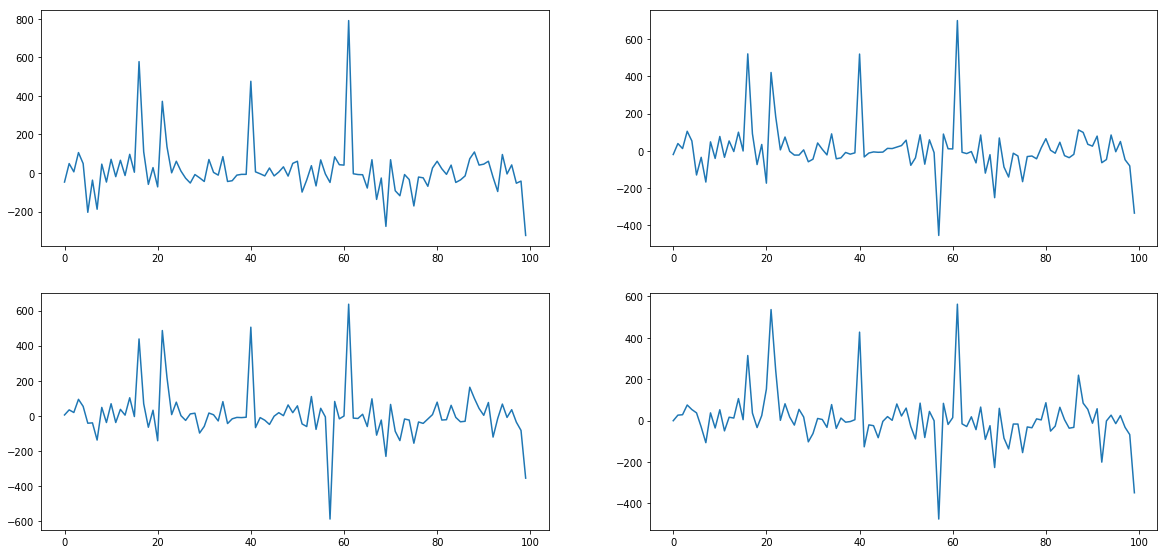

In [54]:
# splitting the dataset into train and test in the ratio 80:20
df_array = df.values
X_train, X_test, y_train, y_test = train_test_split(df_array[:,0:df.shape[1]-1], \
                                                    df_array[:,df.shape[1]-1], \
                                                    test_size=0.2)

print("X_train has {0} observations with {1} features".format(X_train.shape[0], X_train.shape[1]))
print("y_train has {0} class values".format(y_train.shape[0]))
print("X_test has {0} observations with {1} features".format(X_test.shape[0], X_test.shape[1]))
print("y_test has {0} class values".format(y_test.shape[0]))

# plotting the dataset 
plt.rcParams['figure.figsize'] = (20,20)
plt.subplot(4,2,1)
plt.plot(X_train[:100, 0])
plt.subplot(4,2,2)
plt.plot(X_train[:100, 1])
plt.subplot(4,2,3)
plt.plot(X_train[:100, 2])
plt.subplot(4,2,4)
plt.plot(X_train[:100, 3])

## Scaling the Data

/Users/sumitsaha/anaconda/lib/python3.6/site-packages/sklearn/utils/validation.py:429: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, _DataConversionWarning)
/Users/sumitsaha/anaconda/lib/python3.6/site-packages/sklearn/utils/validation.py:429: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, _DataConversionWarning)
/Users/sumitsaha/anaconda/lib/python3.6/site-packages/sklearn/utils/validation.py:429: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, _DataConversionWarning)


X_train has 9200 observations with 178 features
y_train has 9200 class values
X_test has 2300 observations with 178 features
y_test has 2300 class values


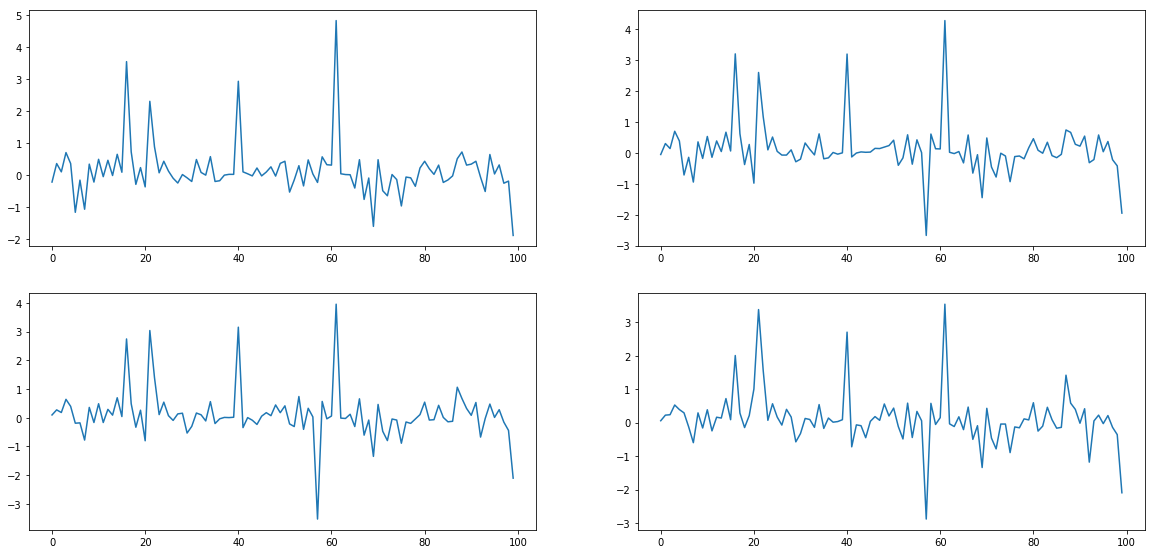

In [55]:
# diminishing the extreme variations in the dataset values
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

print("X_train has {0} observations with {1} features".format(X_train.shape[0], X_train.shape[1]))
print("y_train has {0} class values".format(y_train.shape[0]))
print("X_test has {0} observations with {1} features".format(X_test.shape[0], X_test.shape[1]))
print("y_test has {0} class values".format(y_test.shape[0]))

plt.rcParams['figure.figsize'] = (20,20)
plt.subplot(4,2,1)
plt.plot(X_train[:100, 0])
plt.subplot(4,2,2)
plt.plot(X_train[:100, 1])
plt.subplot(4,2,3)
plt.plot(X_train[:100, 2])
plt.subplot(4,2,4)
plt.plot(X_train[:100, 3])

## Principal Component Analysis: All all features important? Is there any hierarchy of importance?

X_train has 9200 observations with 2 features
y_train has 9200 class values
X_test has 2300 observations with 2 features
y_test has 2300 class values


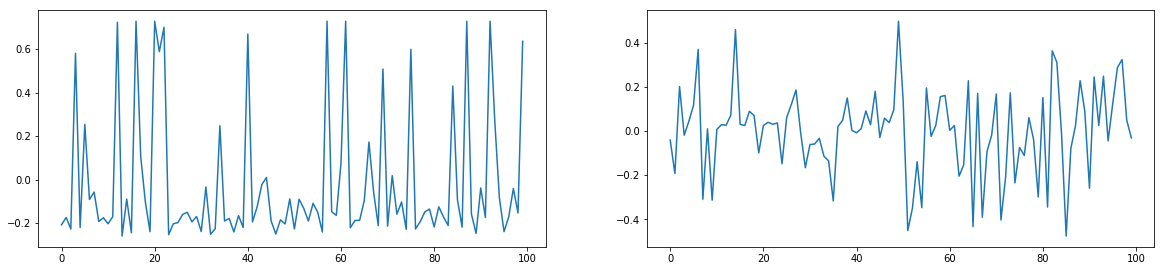

In [56]:
# squashing 178 features into a few important features
from sklearn.decomposition import KernelPCA

kpca = KernelPCA(n_components = 2, kernel = 'rbf')
X_train = kpca.fit_transform(X_train)
X_test = kpca.transform(X_test)

print("X_train has {0} observations with {1} features".format(X_train.shape[0], X_train.shape[1]))
print("y_train has {0} class values".format(y_train.shape[0]))
print("X_test has {0} observations with {1} features".format(X_test.shape[0], X_test.shape[1]))
print("y_test has {0} class values".format(y_test.shape[0]))

plt.rcParams['figure.figsize'] = (20,20)
plt.subplot(4,2,1)
plt.plot(X_train[:100, 0])
plt.subplot(4,2,2)
plt.plot(X_train[:100, 1])

In [57]:
# training the Neural Network
from sklearn.neural_network import MLPClassifier

mlp = MLPClassifier(hidden_layer_sizes = (1000, 500, 200), 
                    activation = 'relu',
                    solver = 'adam', 
                    learning_rate = 'adaptive', 
                    max_iter = 200,
                    verbose = True)

mlp.fit(X_train, y_train)
y_pred = mlp.predict(X_test)
print("Accuracy: {0}%".format(round(mlp.score(X_test,y_test), 2) * 100))

Iteration 1, loss = 0.19950166
Iteration 2, loss = 0.10530230
Iteration 3, loss = 0.10271611
Iteration 4, loss = 0.10076742
Iteration 5, loss = 0.10236770
Iteration 6, loss = 0.09954890
Iteration 7, loss = 0.10057285
Iteration 8, loss = 0.10061536
Iteration 9, loss = 0.09964980
Training loss did not improve more than tol=0.000100 for two consecutive epochs. Stopping.
Accuracy: 96.0%


## Regression using Machine Learning

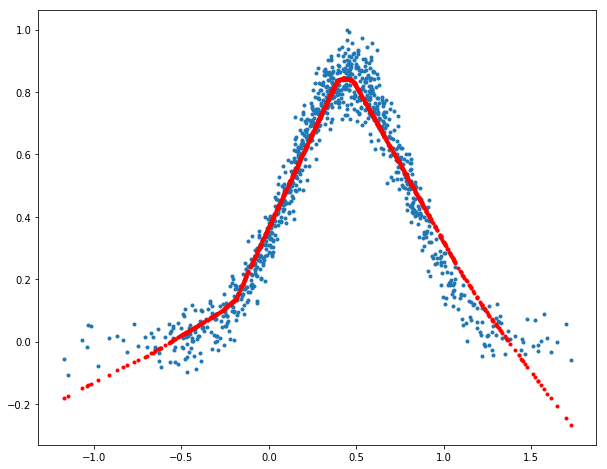

In [58]:
from sklearn.neural_network import MLPRegressor
from sklearn.model_selection import train_test_split

def make_data():
    N = 2000
    X = 0.5*np.random.normal(size=N)+0.35

    Xt = 0.75*X-0.35
    X = X.reshape((N,1))

    Y = -(8 * Xt**2 + 0.1*Xt + 0.1) + 0.05 * np.random.normal(size=N)
    Y = np.exp(Y) + 0.05 * np.random.normal(size=N)
    Y /= max(np.abs(Y))
    return X, Y

np.random.seed(0)
x, y = make_data()

Xtrain, Xtest, Ytrain, Ytest = train_test_split(x, y, test_size=0.5, random_state=0)

mlp = MLPRegressor(random_state = 0)
mlp.fit(x, y)

Yguess = mlp.predict(Xtest)

plt.figure(figsize=(10,8))
plt.plot(Xtest[:,0], Ytest, '.')
plt.plot(Xtest[:,0], Yguess, 'r.')

plt.show()